# March 6, 2023

Last time: working with Numpy arrays


In [1]:
import numpy as np

In [2]:
myarray = np.array([i for i in range(10)])

**Note:** When dealing with lists, slicing returns a new list.

In [4]:
mylist = [i for i in range(10)]
myslice = mylist[::2]

myslice[0] = 99

print(mylist)
print(myslice)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[99, 2, 4, 6, 8]


The change to the slice was not propogated back to the original list. With Numpy arrays, modifying a slice will be progagated back to the original array.

In [5]:
myarray = np.array([i for i in range(10)])
myslice = myarray[::2]

myslice[0] = 99

print(myarray)
print(myslice)

[99  1  2  3  4  5  6  7  8  9]
[99  2  4  6  8]


This can be a great feature as long as we understand how it works.

In [11]:
myarray = np.array([i for i in range(10)])

myarray[1::2] *= -1
myarray[::2] += 100

print(myarray)

[100  -1 102  -3 104  -5 106  -7 108  -9]


## Boolean masks

We can evaluate Boolean expressions on arrays to returns a new array filled with `True`/`False`.

In [13]:
print(myarray)
myarray % 2 == 0

[100  -1 102  -3 104  -5 106  -7 108  -9]


array([ True, False,  True, False,  True, False,  True, False,  True,
       False])

We can check the datatype of elements in an array using the `.dtype` method.

In [14]:
print(myarray.dtype)

int32


In [15]:
print((myarray % 2 == 0).dtype)

bool


Slicing in numpy is far more robust than slicing with lists. As an example, we can use an array of Booleans (with an appropriate shape) to build a slice of an array.

In [17]:
bool_mask = (myarray % 2 == 0)

print(myarray[bool_mask])

myarray[bool_mask] -= 100

print(myarray)

[100 102 104 106 108]
[ 0 -1  2 -3  4 -5  6 -7  8 -9]


## Recall our discussion of the Collatz conjecture:

Consider the function
$$
f(n) = 
\begin{cases}
    3n+1 & \text{if $n$ is odd}
    \\
    n/2 & \text{if $n$ is even}
\end{cases}
$$

For any starting $n$, we generate a sequence $\{a_i\}$ where
$$
a_0 = n, \qquad a_{i+1} = f(a_i) \quad \text{for}\quad i = 0,1,2,\cdots
$$

In [ ]:
def collatz(n):
    if n%2 == 1:
        return 3*n+1
    else:
        return n//2

This version of `collatz` takes in an integer `n` and evaluates the function $f(n)$.

**Exercise:** Write a new version of `collatz` that takes in an array of values, then applies the function $f(n)$ to each value in the array. 

*Hint: use Boolean masks*

In [18]:
def collatz(n_array):
    evenmask = (n_array % 2 == 0)
    oddmask = (n_array % 2 == 1)
    
    n_array[evenmask] //= 2
    n_array[oddmask] = 3*n_array[oddmask] + 1
    
    return n_array

In [19]:
myarray = np.array([i for i in range(1,20)])

collatz(myarray)

array([ 4,  1, 10,  2, 16,  3, 22,  4, 28,  5, 34,  6, 40,  7, 46,  8, 52,
        9, 58])

In [20]:
print(myarray)

[ 4  1 10  2 16  3 22  4 28  5 34  6 40  7 46  8 52  9 58]


Note: because the function `collatz` modifies the array in place, we end up modifying the input array. We can separate the two by creating a `copy` of the input array.

In [21]:
def collatz(n_array):
    out_array = n_array.copy()
    
    evenmask = (n_array % 2 == 0)
    oddmask = (n_array % 2 == 1)
    
    out_array[evenmask] //= 2
    out_array[oddmask] = 3*n_array[oddmask] + 1
    
    return out_array

In [22]:
myarray = np.array([i for i in range(1,20)])

print(collatz(myarray))

print(myarray)

[ 4  1 10  2 16  3 22  4 28  5 34  6 40  7 46  8 52  9 58]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


With this, its very easy for us compute orbits for many numbers. Let's compute 20th element in the orbits for each number $1 \leq n < 20$.

In [24]:
myarray = np.array([i for i in range(1,20)])

for n in range(19):
    myarray = collatz(myarray)
    
print(myarray)

[4 1 1 2 2 2 1 4 1 4 2 4 4 2 2 1 4 2 2]


## Methods for defining numpy arrays:

The `np.arange` function works nearly identically to the `range` function, but returns a numpy array instead.

In [28]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [26]:
np.arange(2,7)

array([2, 3, 4, 5, 6])

In [27]:
np.arange(1,20,3)

array([ 1,  4,  7, 10, 13, 16, 19])

Unlike the `range` function, `np.arange` function can work with non-integer inputs.

In [29]:
for i in range(.1, .9, .15):
    print(i)

TypeError: 'float' object cannot be interpreted as an integer

In [30]:
for i in np.arange(.1, .9, .15):
    print(i)

0.1
0.25
0.4
0.5499999999999999
0.7
0.85


We previously discussed the `np.linspace` function, which returns a grid of equally spaced points:

In [32]:
for i in np.linspace(.1, .9, 9):
    print(i)

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9


We can generate an array of zeros using the `np.zeros` command.

Syntax: `np.zeros(n)` returns an array of length `n` filled with zeros.

In [33]:
print(np.zeros(6))

[0. 0. 0. 0. 0. 0.]


The `np.ones` function works similarly, but returns an array filled with ones.

In [39]:
print(np.ones(4))

[1. 1. 1. 1.]


We can also initialize an empty array using the `np.empty` function:

In [43]:
myarray = np.empty(10)

print(myarray)

[0.1        0.18888889 0.27777778 0.36666667 0.45555556 0.54444444
 0.63333333 0.72222222 0.81111111 0.9       ]


Unlike with lists, there is no `append` method for arrays.

In [48]:
myarray = np.arange(10)

myarray.append(10)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

## List unpacking

In [51]:
mylist = [1,2,3]

a = mylist[0]
b = mylist[1]
c = mylist[2]
print(a,b,c)

1 2 3


In [52]:
mylist = [1,2,3]

d,e,f = mylist

print(d)
print(e)
print(f)

1
2
3


In [53]:
mylist = [10]

a = mylist[0]
print(a)

10


In [54]:
b, = mylist
print(b)

10


## Multiple outputs from a function

In [55]:
def f(a,b):
    return a+b, a*b, a-b

In [57]:
c,d,e = f(3,4)
print(c)
print(d)
print(e)

7
12
-1


## Modifying interactive plots

For interactive plotting, we'll want to store the `figure` output and any `axes` that we generate.
Let's start by plotting a circle in an interactive window.

In [58]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


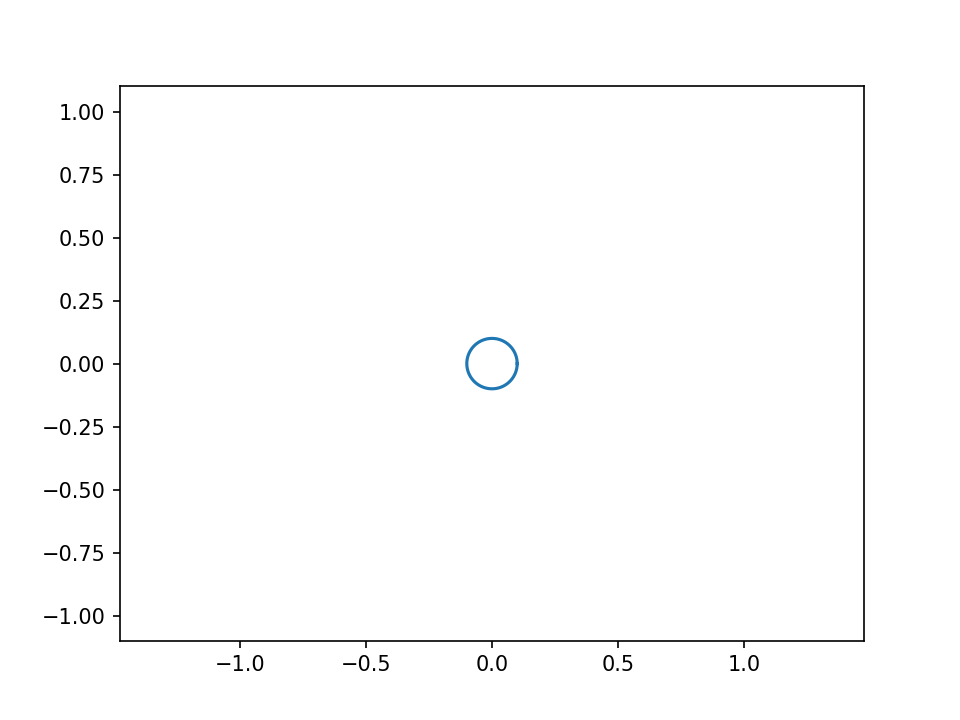

In [62]:
fig = plt.figure()

t = np.linspace(0,2*np.pi,500)
x = np.cos(t)
y = np.sin(t)

p, = plt.plot(x,y)

plt.axis('equal')
plt.show()

We now have a figure object, `fig`, and a line plot, `p`. Now we'll start modifying the plot.

We can update the $x$ data using the `.set_xdata` method, and the $y$ data using the `.set_ydata` method on the line plot object.

The `.canvas.draw()` method for figure objects will force Python to update the figure.

In [63]:
for r in np.linspace(1,0.1,100):
    p.set_xdata(r*x)
    p.set_ydata(r*y)
    fig.canvas.draw()

## The slider widget

<IPython.core.display.Javascript object>


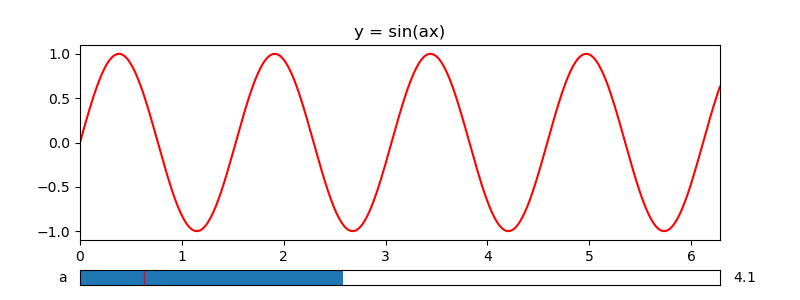

In [72]:
from matplotlib.widgets import Slider  # import the Slider widget

import numpy as np
import matplotlib.pyplot as plt
from math import pi

a_min = 0    # the minimial value of the paramater a
a_max = 10   # the maximal value of the paramater a
a_init = 1   # the value of the parameter a to be used initially, when the graph is created

x = np.linspace(0, 2*pi, 500)

fig = plt.figure(figsize=(8,3))

# first we create the general layount of the figure
# with two axes objects: one for the plot of the function
# and the other for the slider
sin_ax = plt.axes([0.1, 0.2, 0.8, 0.65])
slider_ax = plt.axes([0.1, 0.05, 0.8, 0.05])


# in plot_ax we plot the function with the initial value of the parameter a
plt.axes(sin_ax) # select sin_ax
plt.title('y = sin(ax)')
sin_plot, = plt.plot(x, np.sin(a_init*x), 'r')
plt.xlim(0, 2*pi)
plt.ylim(-1.1, 1.1)

# here we create the slider
a_slider = Slider(slider_ax,      # the axes object containing the slider
                  'a',            # the name of the slider parameter
                  a_min,          # minimal value of the parameter
                  a_max,          # maximal value of the parameter
                  valinit=a_init  # initial value of the parameter
                 )

# Next we define a function that will be executed each time the value
# indicated by the slider changes. The variable of this function will
# be assigned the value of the slider.
def update(args):
    sin_plot.set_ydata(np.sin(a_slider.val*x)) # set new y-coordinates of the plotted points
    fig.canvas.draw_idle()          # redraw the plot

# the final step is to specify that the slider needs to
# execute the above function when its value changes
a_slider.on_changed(update)

plt.show()

Lissajous curves are curves given by the parametric equations
$$
x = \sin(at)
$$
$$
y = \cos(bt)
$$

**Exercise:** Create an interactive plot with sliders for the parameters $a$ and $b$ to generate Lissajous curves.

Suggestion:
1. First, modify the above code to plot a Lissajous curve with $b$ fixed and $a$ controlled by the existing slider.
2. Then introduce a second slider for the $b$ parameter.

<IPython.core.display.Javascript object>


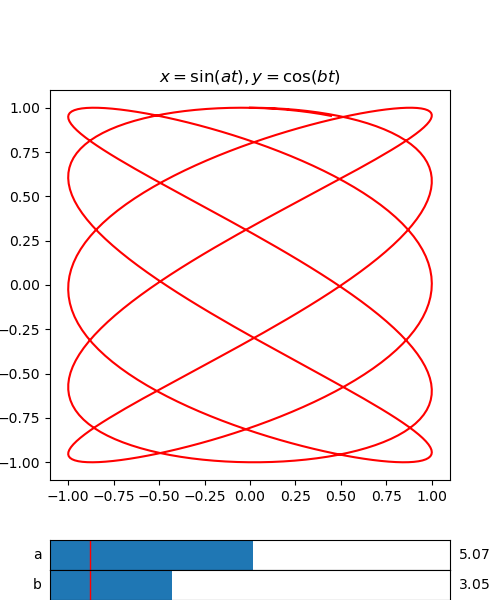

In [73]:
from matplotlib.widgets import Slider  # import the Slider widget

import numpy as np
import matplotlib.pyplot as plt
from math import pi

a_min = 0    # the minimial value of the paramater a
a_max = 10   # the maximal value of the paramater a
a_init = 1   # the value of the parameter a to be used initially, when the graph is created

b_min = 0    # the minimial value of the paramater b
b_max = 10   # the maximal value of the paramater b
b_init = 1   # the value of the parameter b to be used initially, when the graph is created

t = np.linspace(0, 2*pi, 500)
x = np.sin(a_init*t)
y = np.cos(b_init*t)

fig = plt.figure(figsize=(5,6))

# first we create the general layount of the figure
# with two axes objects: one for the plot of the function
# and the other for the slider
liss_ax = plt.axes([0.1, 0.2, 0.8, 0.65])
slider_a_ax = plt.axes([0.1, 0.05, 0.8, 0.05])
slider_b_ax = plt.axes([0.1, 0,    0.8, 0.05])


# in plot_ax we plot the function with the initial value of the parameter a
plt.axes(liss_ax) # select sin_ax
plt.title('$x = \sin(at), y = \cos(bt)$')
liss_plot, = plt.plot(x, y, 'r')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# here we create the slider
a_slider = Slider(slider_a_ax,      # the axes object containing the slider
                  'a',            # the name of the slider parameter
                  a_min,          # minimal value of the parameter
                  a_max,          # maximal value of the parameter
                  valinit=a_init  # initial value of the parameter
                 )

b_slider = Slider(slider_b_ax,      # the axes object containing the slider
                  'b',            # the name of the slider parameter
                  b_min,          # minimal value of the parameter
                  b_max,          # maximal value of the parameter
                  valinit=b_init  # initial value of the parameter
                 )

# Next we define a function that will be executed each time the value
# indicated by the slider changes. The variable of this function will
# be assigned the value of the slider.
def update(args):
    liss_plot.set_xdata(np.sin(a_slider.val*t)) # set new y-coordinates of the plotted points
                                               # a_slider.val grabs the current value of a
    liss_plot.set_ydata(np.cos(b_slider.val*t))
    fig.canvas.draw_idle()                     # redraw the plot

# the final step is to specify that the slider needs to
# execute the above function when its value changes
a_slider.on_changed(update)
b_slider.on_changed(update)

plt.show()

We can specify a sliders orientation (horizontal/vertical) using the `orientation` keyword.

<IPython.core.display.Javascript object>


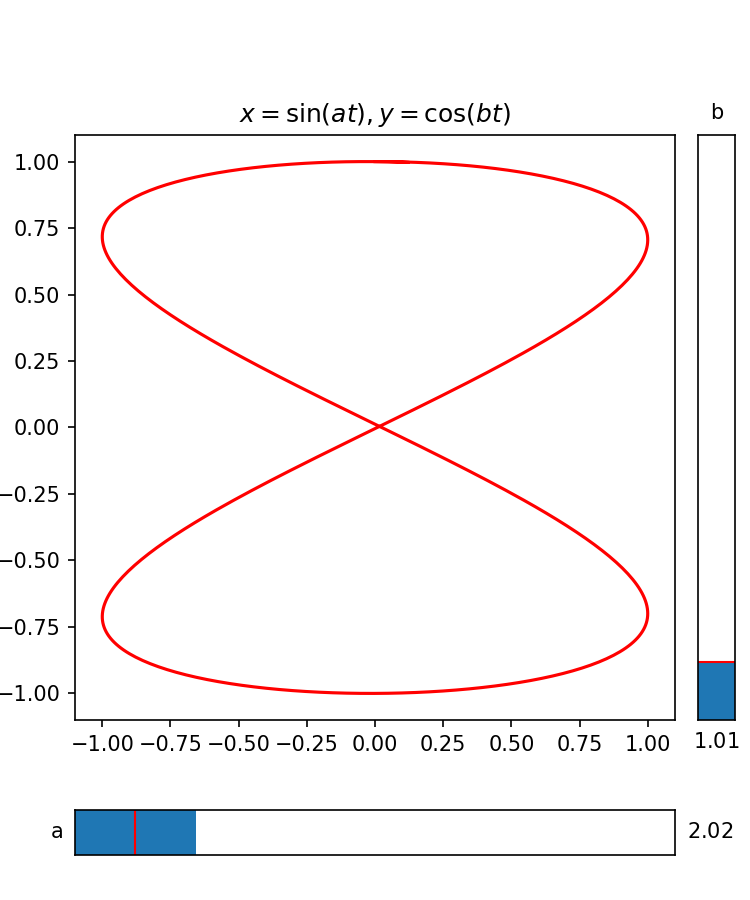

In [71]:
from matplotlib.widgets import Slider  # import the Slider widget

import numpy as np
import matplotlib.pyplot as plt
from math import pi

a_min = 0    # the minimial value of the paramater a
a_max = 10   # the maximal value of the paramater a
a_init = 1   # the value of the parameter a to be used initially, when the graph is created

b_min = 0    # the minimial value of the paramater b
b_max = 10   # the maximal value of the paramater b
b_init = 1   # the value of the parameter b to be used initially, when the graph is created

t = np.linspace(0, 2*pi, 500)
x = np.sin(a_init*t)
y = np.cos(b_init*t)

fig = plt.figure(figsize=(5,6))

# first we create the general layount of the figure
# with two axes objects: one for the plot of the function
# and the other for the slider
liss_ax = plt.axes([0.1, 0.2, 0.8, 0.65])
slider_a_ax = plt.axes([0.1, 0.05, 0.8, 0.05])
slider_b_ax = plt.axes([0.93, 0.2,  0.05, 0.65])


# in plot_ax we plot the function with the initial value of the parameter a
plt.axes(liss_ax) # select sin_ax
plt.title('$x = \sin(at), y = \cos(bt)$')
liss_plot, = plt.plot(x, y, 'r')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# here we create the slider
a_slider = Slider(slider_a_ax,      # the axes object containing the slider
                  'a',            # the name of the slider parameter
                  a_min,          # minimal value of the parameter
                  a_max,          # maximal value of the parameter
                  valinit=a_init  # initial value of the parameter
                 )

b_slider = Slider(slider_b_ax,      # the axes object containing the slider
                  'b',            # the name of the slider parameter
                  b_min,          # minimal value of the parameter
                  b_max,          # maximal value of the parameter
                  valinit=b_init,  # initial value of the parameter
                  orientation='vertical'
                 )

# Next we define a function that will be executed each time the value
# indicated by the slider changes. The variable of this function will
# be assigned the value of the slider.
def update(args):
    liss_plot.set_xdata(np.sin(a_slider.val*t)) # set new y-coordinates of the plotted points
                                               # a_slider.val grabs the current value of a
    liss_plot.set_ydata(np.cos(b_slider.val*t))
    fig.canvas.draw_idle()                     # redraw the plot

# the final step is to specify that the slider needs to
# execute the above function when its value changes
a_slider.on_changed(update)
b_slider.on_changed(update)

plt.show()